![for sale image, from https://time.com/5835778/selling-home-coronavirus/](https://api.time.com/wp-content/uploads/2020/05/selling-home-coronavirus.jpg?w=800&quality=85)

# KING COUNTY HOME PRICE PREDICTION

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

Questions to consider:

- Who are your stakeholders? 

Real estate agency helping home buyers.

- What are your stakeholders' pain points related to this project?

- Why are your predictions important from a business perspective?

In [139]:
# # Necessary imports
# import sys, os
# # Check current options in your sys path (sith path)
# sys.path
# # Get and append your root path, based on 2 parent directories
# root_path = os.path.join(os.pardir, os.pardir)
# sys.path.append(root_path)

In [140]:
# Basic imports
import numpy as np
import pandas as pd
# Data visualizations
import matplotlib.pyplot as plt
import seaborn as sns
# Pre-Processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
# Metrics
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from geopy import distance


In [141]:
import sys, os

In [142]:
sys.path

['C:\\Users\\emine\\Documents\\Flatiron\\Phase2\\Housing_Analysis\\Notebooks\\Emine',
 'C:\\Users\\emine\\anaconda3\\envs\\learn-env\\python38.zip',
 'C:\\Users\\emine\\anaconda3\\envs\\learn-env\\DLLs',
 'C:\\Users\\emine\\anaconda3\\envs\\learn-env\\lib',
 'C:\\Users\\emine\\anaconda3\\envs\\learn-env',
 '',
 'C:\\Users\\emine\\anaconda3\\envs\\learn-env\\lib\\site-packages',
 'C:\\Users\\emine\\anaconda3\\envs\\learn-env\\lib\\site-packages\\win32',
 'C:\\Users\\emine\\anaconda3\\envs\\learn-env\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\emine\\anaconda3\\envs\\learn-env\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\emine\\anaconda3\\envs\\learn-env\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\emine\\.ipython',
 '..\\..']

In [143]:
root_path = os.path.join(os.pardir, os.pardir)
root_path

'..\\..'

In [144]:
os.path.abspath(root_path)
sys.path.append(root_path)

In [145]:
# importing utility functions
# from utils import evaluate
# OR
# import utils as ut

In [146]:
# # utils.py
# import matplotlib.pyplot as plt
# from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# def evaluate(y_train, train_preds, y_test, test_preds):
#     '''
#     Evaluate the amount of error between my model's predictionms and the actual values
#     for both a train and a test set
    
#     Inputs: 
#         y_train - array like, actual values for 'price for my train dataset
#         train_preds - array like, predicted values for 'price' for my train dataset
#         y_test
#         test_preds
    
#     Outputs:
#         None
#     '''
#     print(f"Train R2: {r2_score(y_train, train_preds):.4f}")
#     print(f"Test R2: {r2_score(y_test, test_preds):.4f}")
#     print("*****")
#     print(f"Train RMSE: ${mean_squared_error(y_train, train_preds, squared=False):,.2f}")
#     print(f"Train RMSE: ${mean_squared_error(y_test, test_preds, squared=False):,.2f}")
#     print("*****")
#     print(f"Train MAE: ${mean_absolute_error(y_train, train_preds):,.2f}")
#     print(f"Train MAE: ${mean_absolute_error(y_test, test_preds):,.2f}")
#     print("*****")
    
#     # Calculate our residuals 
#     train_residuals = y_train - train_preds
#     test_residuals = y_test - test_preds
    
#     # Scatter plot 
#     plt.scatter(train_preds, train_residuals, label = 'Train')
#     plt.scatter(test_preds, test_residuals, label = 'Test')
    
#     plt.axhline(y=0, color = 'red', label = '0')
#     plt.xlabel('predictions')
#     plt.ylabel('residuals')
#     plt.legend()
    
#     sm.qqplot(train_residuals, line = 'r', label = 'train residuals');
#     plt.legend()
    
#     sm.qqplot(test_residuals, line = 'r', label = 'test residuals');
#     plt.legend()
#     plt.show()
    
    

In [147]:
# Logged version:

def evaluate(y_train, train_preds, y_test, test_preds, log=False):
    '''
    Evaluate the amount of error between my model's predictionms and the actual values
    for both a train and a test set
    
    Inputs: 
        y_train - array like, actual values for 'price for my train dataset
        train_preds - array like, predicted values for 'price' for my train dataset
        y_test
        test_preds
    
    Outputs:
        None
    '''
    print(f"Train R2: {r2_score(y_train, train_preds):.4f}")
    print(f"Test R2: {r2_score(y_test, test_preds):.4f}")
    print("*****")
    
    if log == False:
        print(f"Train RMSE: ${mean_squared_error(y_train, train_preds, squared=False):,.2f}")
        print(f"Train RMSE: ${mean_squared_error(y_test, test_preds, squared=False):,.2f}")
        print("*****")
        print(f"Train MAE: ${mean_absolute_error(y_train, train_preds):,.2f}")
        print(f"Train MAE: ${mean_absolute_error(y_test, test_preds):,.2f}")
        print("*****")
    
    
    else:
        y_tr_unlog = np.exp(y_train)
        tr_pred_unlog=np.exp(train_preds)
        y_te_unlog=np.exp(y_test)
        te_pred_unlog=np.exp(test_preds)
        
        print(f"Train RMSE: ${mean_squared_error(y_tr_unlog, tr_pred_unlog, squared=False):,.2f}")
        print(f"Train RMSE: ${mean_squared_error(y_te_unlog, te_pred_unlog, squared=False):,.2f}")
        print("*****")
        print(f"Train MAE: ${mean_absolute_error(y_tr_unlog, tr_pred_unlog):,.2f}")
        print(f"Train MAE: ${mean_absolute_error(y_te_unlog, te_pred_unlog):,.2f}")
        print("*****")
        
    
    # Calculate our residuals 
    train_residuals = y_train - train_preds
    test_residuals = y_test - test_preds
    
    # Scatter plot 
    plt.scatter(train_preds, train_residuals, label = 'Train')
    plt.scatter(test_preds, test_residuals, label = 'Test')
    
    plt.axhline(y=0, color = 'red', label = '0')
    plt.xlabel('predictions')
    plt.ylabel('residuals')
    plt.legend()
   
    sm.qqplot(train_residuals, line = 'r', label = 'train residuals');
    plt.legend()
    
    sm.qqplot(test_residuals, line = 'r', label = 'test residuals');
    plt.legend()
    plt.show()  

In [ ]:
# if log == True:
# 	y_tr_unlog = np.exp(y_tr)
# 	tr_pred_unlog = np.exp(tr_pred)
# 	y_te_unlog = np.exp(y_te)
# 	te_pred_unlog = np.exp(te_pred)
	
# # Printing scores
# print("Training Scores")
# print("-"*10)
# print(f"R2: {r2_score(y_tr, tr_pred):.4f}") # R2 should not be done on unlogged values
# if log == True:
# 	print(f"RMSE: {mean_squared_error(y_tr_unlog, tr_pred_unlog, squared=False):.4f}")
# 	print(f"MAE: {mean_absolute_error(y_tr_unlog, tr_pred_unlog):.4f}")
# else:
# 	print(f"RMSE: {mean_squared_error(y_tr, tr_pred, squared=False):.4f}")
# 	print(f"MAE: {mean_absolute_error(y_tr, tr_pred):.4f}")
# ​
# print("\n"+"*"*10) # print a break between train and test scores
# ​
# # Printing test scores
# print("Testing Scores")
# print("-"*10)
# print(f"R2: {r2_score(y_te, te_pred):.4f}") # R2 should not be done on unlogged values
# if log == True:
# 	print(f"RMSE: {mean_squared_error(y_te_unlog, te_pred_unlog, squared=False):.4f}")
# 	print(f"MAE: {mean_absolute_error(y_te_unlog, te_pred_unlog):.4f}")
# else:
# 	print(f"RMSE: {mean_squared_error(y_te, te_pred, squared=False):.4f}")
# 	print(f"MAE: {mean_absolute_error(y_te, te_pred):.4f}")
# Collapse










In [148]:
!ls ../../data

column_names.md
kc_house_data.csv


In [149]:
# To visualize the hidden columns in data
pd.options.display.max_columns=100 

## Data Understanding

Describe the data being used for this project.

Questions to consider:

- Where did the data come from, and how do they relate to the data analysis questions?
- What do the data represent? Who is in the sample and what variables are included?
- What is the target variable?
- What are the properties of the variables you intend to use?

In [150]:
# code here to explore your data
df = pd.read_csv("../../data/kc_house_data.csv")

In [151]:
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors waterfront  view  condition          grade  sqft_above  \
0      5650     1.0        NaN  NONE    Average      7 Average        1180   
1      7242     2.0         NO  NONE    Average      7 Average        2170   
2     10000     1.0         NO  NONE    Average  6 Low Average         770   
3      5000     1.0         NO  NONE  Very Good      7 Average        1050   
4      8080     1.0         NO  NONE    Average         8 Good        1680   

  sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0           0.0      1955           0.0    98178  47.5112 -122.257   
1         400.0      1951        1991.0    98125  47.7210 -122.319   
2           0.0      1933           NaN    98028  47.7379 -122.233   
3         910.0      1965           0.0    98136  47.5208 -122.393   
4           0.0      1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503

In [152]:
df.shape

(21597, 21)

In [153]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    sqft_above      yr_built  yr_renovated  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  17755.000000   
mean   1.509941e+04      1.494096   1788.596842   1970.999676     83.636778   
std    4.141264e+04      0.539683    827.759761     29.375234    399.946414   
min    5.200000e+02      1.000000    370.000000   1900.000000      0.000000   
25%    5.040000e+03      1.000000   1190.000000   1951.000000      0.000000   
50%    7.618000e+03      1.500000   1560.000000   1975.000000      0.000000   
75%    1.068500e+04      2.000000   2210.000000   1997.000000      0.000000   
max    1.651359e+06      3.500000   9410.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000  21597.000000   21597.000000   21597.000000  
mean   98077.951845     47.560093   -122.213982    1986.620318   12758.283512  
std       53.513072      0.138552      0.140724     685.230472   27274.441950  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471100   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.231000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

Price is the target variable for our business problem.

The data includes Kings County houses' information and sell prices from 1900 to 2015.

In [154]:
#sns.pairplot(df)

## Data Preparation

Describe and justify the process for preparing the data for analysis.

Questions to consider:

- Were there variables you dropped or created?
- How did you address missing values or outliers?
- Why are these choices appropriate given the data and the business problem?

In [155]:
df['id'].value_counts()

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64

In [156]:
df[df['id']==795000620] # Multiple rows for same house means that the house is sold multiple times!

id        date     price  bedrooms  bathrooms  sqft_living  \
17588  795000620   9/24/2014  115000.0         3        1.0         1080   
17589  795000620  12/15/2014  124000.0         3        1.0         1080   
17590  795000620   3/11/2015  157000.0         3        1.0         1080   

       sqft_lot  floors waterfront  view condition   grade  sqft_above  \
17588      6250     1.0         NO  NONE      Fair  5 Fair        1080   
17589      6250     1.0         NO  NONE      Fair  5 Fair        1080   
17590      6250     1.0        NaN  NONE      Fair  5 Fair        1080   

      sqft_basement  yr_built  yr_renovated  zipcode      lat    long  \
17588           0.0      1950           0.0    98168  47.5045 -122.33   
17589           0.0      1950           0.0    98168  47.5045 -122.33   
17590           0.0      1950           NaN    98168  47.5045 -122.33   

       sqft_living15  sqft_lot15  
17588           1070        6250  
17589           1070        6250  
17590           1070        6250

We should keep the multiple rows to reflect price change over the years. 

In [157]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [158]:
df[df['bedrooms']==33]

id       date     price  bedrooms  bathrooms  sqft_living  \
15856  2402100895  6/25/2014  640000.0        33       1.75         1620   

       sqft_lot  floors waterfront  view  condition      grade  sqft_above  \
15856      6000     1.0         NO  NONE  Very Good  7 Average        1040   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
15856         580.0      1947           0.0    98103  47.6878 -122.331   

       sqft_living15  sqft_lot15  
15856           1330        4700

It is impossible to have 33 bedrooms house with 1620 sqrt living area and 1 floor. There must be typing error. We should replace 33 with the mean of number of bedrooms, which is 3.

In [159]:
df['bedrooms'].replace(33, 3, inplace=True)

In [160]:
df['bedrooms'].value_counts()

3     9825
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

In [161]:
df[df['bedrooms']==11]

id       date     price  bedrooms  bathrooms  sqft_living  \
8748  1773100755  8/21/2014  520000.0        11        3.0         3000   

      sqft_lot  floors waterfront  view condition      grade  sqft_above  \
8748      4960     2.0         NO  NONE   Average  7 Average        2400   

     sqft_basement  yr_built  yr_renovated  zipcode     lat     long  \
8748         600.0      1918        1999.0    98106  47.556 -122.363   

      sqft_living15  sqft_lot15  
8748           1420        4960

In [162]:
df[df['bedrooms']==10]

id        date      price  bedrooms  bathrooms  sqft_living  \
13301   627300145   8/14/2014  1150000.0        10       5.25         4590   
15147  5566100170  10/29/2014   650000.0        10       2.00         3610   
19239  8812401450  12/29/2014   660000.0        10       3.00         2920   

       sqft_lot  floors waterfront     view condition      grade  sqft_above  \
13301     10920     1.0         NO  AVERAGE   Average   9 Better        2500   
15147     11914     2.0         NO     NONE      Good  7 Average        3010   
19239      3745     2.0         NO     NONE      Good  7 Average        1860   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
13301        2090.0      2008           0.0    98004  47.5861 -122.113   
15147         600.0      1958           0.0    98006  47.5705 -122.175   
19239        1060.0      1913           0.0    98105  47.6635 -122.320   

       sqft_living15  sqft_lot15  
13301           2730       10400  
15147           2040       11914  
19239           1810        3745

In [163]:
df= df[df['bedrooms']<7]

In [164]:
df['grade'].value_counts()

7 Average        8950
8 Good           6048
9 Better         2609
6 Low Average    2037
10 Very Good     1128
11 Excellent      394
5 Fair            242
12 Luxury          87
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [165]:
df['grade_int'] = df['grade'].str[:2].astype('int64')

In [166]:
df['condition'].value_counts()

Average      13979
Good          5663
Very Good     1695
Fair           170
Poor            29
Name: condition, dtype: int64

In [167]:
df['zipcode'].value_counts()

98103    600
98038    589
98115    583
98052    574
98117    550
        ... 
98102    102
98010    100
98024     80
98148     57
98039     49
Name: zipcode, Length: 70, dtype: int64

In [168]:
df['yr_built'].value_counts()

2014    559
2006    453
2005    450
2004    432
2003    420
       ... 
1933     30
1901     27
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

In [169]:
df['sqft_basement'].value_counts()

0.0       12807
?           452
600.0       214
500.0       209
700.0       208
          ...  
1770.0        1
1852.0        1
784.0         1
2010.0        1
2196.0        1
Name: sqft_basement, Length: 302, dtype: int64

In [170]:
# sqft_basement has ? as a value, we should 
df[df['sqft_basement'] == '?']

id        date      price  bedrooms  bathrooms  sqft_living  \
6      1321400060   6/27/2014   257500.0         3       2.25         1715   
18       16000397   12/5/2014   189000.0         2       1.00         1200   
42     7203220400    7/7/2014   861990.0         5       2.75         3595   
79     1531000030   3/23/2015   720000.0         4       2.50         3450   
112    2525310310   9/16/2014   272500.0         3       1.75         1540   
...           ...         ...        ...       ...        ...          ...   
21442  3226049565   7/11/2014   504600.0         5       3.00         2360   
21447  1760650900   7/21/2014   337500.0         4       2.50         2330   
21473  6021503707   1/20/2015   352500.0         2       2.50          980   
21519  2909310100  10/15/2014   332000.0         4       2.50         2380   
21581   191100405   4/21/2015  1580000.0         4       3.25         3410   

       sqft_lot  floors waterfront  view condition         grade  sqft_above  \
6          6819     2.0         NO  NONE   Average     7 Average        1715   
18         9850     1.0         NO  NONE      Good     7 Average        1200   
42         5639     2.0         NO  NONE   Average      9 Better        3595   
79        39683     2.0         NO  NONE   Average  10 Very Good        3450   
112       12600     1.0         NO  NONE      Good     7 Average        1160   
...         ...     ...        ...   ...       ...           ...         ...   
21442      5000     1.0         NO  NONE   Average     7 Average        1390   
21447      4907     2.0         NO  NONE   Average     7 Average        2330   
21473      1010     3.0        NaN  NONE   Average        8 Good         980   
21519      5737     2.0         NO  NONE   Average     7 Average        2380   
21581     10125     2.0         NO  NONE   Average  10 Very Good        3410   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
6                 ?      1995           0.0    98003  47.3097 -122.327   
18                ?      1921           0.0    98002  47.3089 -122.210   
42                ?      2014           0.0    98053  47.6848 -122.016   
79                ?      2002           0.0    98010  47.3420 -122.025   
112               ?      1980           0.0    98038  47.3624 -122.031   
...             ...       ...           ...      ...      ...      ...   
21442             ?      2008           0.0    98103  47.6931 -122.330   
21447             ?      2013           NaN    98042  47.3590 -122.081   
21473             ?      2008           0.0    98117  47.6844 -122.387   
21519             ?      2010           0.0    98023  47.2815 -122.356   
21581             ?      2007           NaN    98040  47.5653 -122.223   

       sqft_living15  sqft_lot15  grade_int  
6               2238        6819          7  
18              1060        5095          7  
42              3625        5639          9  
79              3350       39750         10  
112             1540       11656          7  
...              ...         ...        ...  
21442           2180        5009          7  
21447           2300        3836          7  
21473            980        1023          8  
21519           2380        5396          7  
21581           2290       10125         10  

[452 rows x 22 columns]

In [171]:
df['sqft_basement'] = df['sqft_living'] - df['sqft_above']

#### Check null values in the dataframe

In [172]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2371
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3828
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
grade_int           0
dtype: int64

The columns named as waterfront, view, and yr_renovated have null values.

In [173]:
# waterfront indicates Whether the house is on a waterfront
df['waterfront'].value_counts()

NO     19019
YES      146
Name: waterfront, dtype: int64

In [174]:
df[(df['waterfront']!= 'YES') & (df['waterfront']!= 'NO')]

id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.0         3       1.00         1180   
10     1736800520    4/3/2015  662500.0         3       2.50         3560   
23     8091400200   5/16/2014  252700.0         2       1.50         1070   
40     5547700270   7/15/2014  625000.0         4       2.50         2570   
55     9822700295   5/12/2014  885000.0         4       2.50         2830   
...           ...         ...       ...       ...        ...          ...   
21578  5087900040  10/17/2014  350000.0         4       2.75         2500   
21582  8956200760  10/13/2014  541800.0         4       2.50         3118   
21586   844000965   6/26/2014  224000.0         3       1.75         1500   
21587  7852140040   8/25/2014  507250.0         3       2.50         2270   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   

       sqft_lot  floors waterfront     view condition          grade  \
0          5650     1.0        NaN     NONE   Average      7 Average   
10         9796     1.0        NaN     NONE   Average         8 Good   
23         9643     1.0        NaN     NONE   Average      7 Average   
40         5520     2.0        NaN     NONE   Average       9 Better   
55         5000     2.0        NaN     NONE   Average       9 Better   
...         ...     ...        ...      ...       ...            ...   
21578      5995     2.0        NaN     NONE   Average         8 Good   
21582      7866     2.0        NaN  AVERAGE   Average       9 Better   
21586     11968     1.0        NaN     NONE   Average  6 Low Average   
21587      5536     2.0        NaN     NONE   Average         8 Good   
21595      2388     2.0        NaN     NONE   Average         8 Good   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
0            1180              0      1955           0.0    98178  47.5112   
10           1860           1700      1965           0.0    98007  47.6007   
23           1070              0      1985           NaN    98030  47.3533   
40           2570              0      2000           NaN    98074  47.6145   
55           2830              0      1995           0.0    98105  47.6597   
...           ...            ...       ...           ...      ...      ...   
21578        2500              0      2008           0.0    98042  47.3749   
21582        3118              0      2014           0.0    98001  47.2931   
21586        1500              0      2014           0.0    98010  47.3095   
21587        2270              0      2003           0.0    98065  47.5389   
21595        1600              0      2004           0.0    98027  47.5345   

          long  sqft_living15  sqft_lot15  grade_int  
0     -122.257           1340        5650          7  
10    -122.145           2210        8925          8  
23    -122.166           1220        8386          7  
40    -122.027           2470        5669          9  
55    -122.290           1950        5000          9  
...        ...            ...         ...        ...  
21578 -122.107           2530        5988          8  
21582 -122.264           2673        6500          9  
21586 -122.002           1320       11303          6  
21587 -121.881           2270        5731          8  
21595 -122.069           1410        1287          8  

[2371 rows x 22 columns]

Let's convert YES value as 1, NO value as 0, and also replace NaN values with 0:

In [175]:
df['waterfront'].replace("YES", 1, inplace=True)

In [176]:
df['waterfront'].replace("NO", 0, inplace=True)

In [177]:
df['waterfront'].fillna(value=0,inplace=True)

In [178]:
df['waterfront'].value_counts()

0.0    21390
1.0      146
Name: waterfront, dtype: int64

In [179]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3828
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
grade_int           0
dtype: int64

In [180]:
df['view'].value_counts()

NONE         19372
AVERAGE        952
GOOD           507
FAIR           327
EXCELLENT      315
Name: view, dtype: int64

In [181]:
df['view'].fillna(value="None",inplace=True)

In [182]:
df['view_YES'] = df['view']
df['view_YES'].replace('NONE', 0, inplace=True)
df['view_YES'].replace('AVERAGE', 1, inplace = True)
df['view_YES'].replace('GOOD', 1, inplace = True)
df['view_YES'].replace('FAIR', 1, inplace = True)
df['view_YES'].replace('EXCELLENT', 1, inplace = True)
df['view_YES'].value_counts()

0       19372
1        2101
None       63
Name: view_YES, dtype: int64

We replaced null values of views of the column as None.

In [183]:
df['yr_renovated'].value_counts()

0.0       16970
2014.0       73
2007.0       30
2003.0       30
2013.0       30
          ...  
1959.0        1
1953.0        1
1944.0        1
1950.0        1
1948.0        1
Name: yr_renovated, Length: 70, dtype: int64

Most of the houses are not renovated, so we can replace NaN values with zero.

In [189]:
df['yr_renovated'].fillna(value=0,inplace=True)

In [190]:
df['yr_renovated'].value_counts()

0.0       20798
2014.0       73
2007.0       30
2003.0       30
2013.0       30
          ...  
1959.0        1
1953.0        1
1944.0        1
1950.0        1
1948.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [191]:
age_data = []
for i in df.index:
    if df.loc[i]['yr_renovated']==0.0:
        age = 2016 - df.loc[i]['yr_built']  
    else:
        age = 2016 - df.loc[i]['yr_renovated']
    age_data.append(age)

df['house_age'] = age_data

In [192]:
df[['house_age', 'yr_built', 'yr_renovated']].head(10)

house_age  yr_built  yr_renovated
0       61.0      1955           0.0
1       25.0      1951        1991.0
2       83.0      1933           0.0
3       51.0      1965           0.0
4       29.0      1987           0.0
5       15.0      2001           0.0
6       21.0      1995           0.0
7       53.0      1963           0.0
8       56.0      1960           0.0
9       13.0      2003           0.0

We will create distance to city center measure for each house. For distance, we used Google Maps Downtown Seattle coordinates 47.6050° N, 122.3344° W to calculated the mileage from a given property to the center of downtown.

In [51]:
distance_data= []
for i in df.index:
    location = (df.loc[i]['lat'],df.loc[i]['long'])
    downtown = (47.6050, -122.3344)
    dist = distance.distance(location, downtown).miles
    distance_data.append(dist)

df['distance'] = distance_data

In [193]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
grade_int        0
view_YES         0
house_age        0
dtype: int64

We cleaned all of the missing values from our dataframe.

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21536 entries, 0 to 21596
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21536 non-null  int64  
 1   date           21536 non-null  object 
 2   price          21536 non-null  float64
 3   bedrooms       21536 non-null  int64  
 4   bathrooms      21536 non-null  float64
 5   sqft_living    21536 non-null  int64  
 6   sqft_lot       21536 non-null  int64  
 7   floors         21536 non-null  float64
 8   waterfront     21536 non-null  float64
 9   view           21536 non-null  object 
 10  condition      21536 non-null  object 
 11  grade          21536 non-null  object 
 12  sqft_above     21536 non-null  int64  
 13  sqft_basement  21536 non-null  int64  
 14  yr_built       21536 non-null  int64  
 15  yr_renovated   17708 non-null  object 
 16  zipcode        21536 non-null  int64  
 17  lat            21536 non-null  float64
 18  long  

The columns named 'date', 'view', 'condition', and 'grade' are stored as objects, not numerical values.

In [55]:
df.select_dtypes(include = 'object')

date  view  condition          grade yr_renovated view_YES
0      10/13/2014  NONE    Average      7 Average          NaN        0
1       12/9/2014  NONE    Average      7 Average         1991        0
2       2/25/2015  NONE    Average  6 Low Average          NaN        0
3       12/9/2014  NONE  Very Good      7 Average          NaN        0
4       2/18/2015  NONE    Average         8 Good          NaN        0
...           ...   ...        ...            ...          ...      ...
21592   5/21/2014  NONE    Average         8 Good          NaN        0
21593   2/23/2015  NONE    Average         8 Good          NaN        0
21594   6/23/2014  NONE    Average      7 Average          NaN        0
21595   1/16/2015  NONE    Average         8 Good          NaN        0
21596  10/15/2014  NONE    Average      7 Average          NaN        0

[21536 rows x 6 columns]

In [56]:
# Split up 'condition', 'view' and 'grade' columns: Change them from object datatype to numerical datatype for analysis:
# These columns have multiple categories and they will need to be expanded into multiple columns.

In [57]:
# Create a variable for view column
view_col = df[["view"]]
condition_df = df[["condition"]]
grade_df = df[['grade']]

# Instantiate a OneHotEncoder with categories="auto",
# sparse=False, and handle_unknown="ignore"
ohe_view = OneHotEncoder(categories="auto",sparse=False, handle_unknown="ignore")
ohe_cond = OneHotEncoder(categories="auto", sparse=False, handle_unknown="ignore")
ohe_grade = OneHotEncoder(categories = 'auto', sparse=False, handle_unknown ='ignore')

# Fit the encoder on view_col
ohe_view.fit(view_col)
ohe_cond.fit(condition_df)
ohe_grade.fit(grade_df)

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [58]:
# Transform view_col using the encoder and
# assign the result to view_col_encoded
view_col_encoded = ohe_view.transform(view_col)
condition_df_encoded = ohe_cond.transform(condition_df)
grade_encoded = ohe_grade.transform(grade_df)

In [59]:
# Make the transformed data into a dataframe
view_col_encoded = pd.DataFrame(
    # Pass in NumPy array
    view_col_encoded,
    # Set the column names to the categories found by OHE
    columns="view_"+ohe_view.categories_[0],
    # Set the index to match df's index
    index=df.index
)
condition_df_encoded = pd.DataFrame(
    # Pass in NumPy array
    condition_df_encoded,
    # Set the column names to the categories found by OHE
    columns="cond_"+ohe_cond.categories_[0],
    # Set the index to match df's index
    index=df.index
)
grade_encoded = pd.DataFrame(
    # Pass in NumPy array
    grade_encoded,
    # Set the column names to the categories found by OHE
    columns="grade_"+ohe_grade.categories_[0],
    # Set the index to match df's index
    index=df.index
)

In [60]:
# Drop original view column
df.drop("view", axis=1, inplace=True)
df.drop("condition", axis=1, inplace=True)
df.drop("grade", axis=1, inplace=True)

# Concatenate the new dataframe with current df
df = pd.concat([df, view_col_encoded, condition_df_encoded, grade_encoded], axis=1)

# Visually inspect df
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  sqft_above  sqft_basement  yr_built  \
0      5650     1.0         0.0        1180              0      1955   
1      7242     2.0         0.0        2170            400      1951   
2     10000     1.0         0.0         770              0      1933   
3      5000     1.0         0.0        1050            910      1965   
4      8080     1.0         0.0        1680              0      1987   

  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
0          NaN    98178  47.5112 -122.257           1340        5650   
1         1991    98125  47.7210 -122.319           1690        7639   
2          NaN    98028  47.7379 -122.233           2720        8062   
3          NaN    98136  47.5208 -122.393           1360        5000   
4          NaN    98074  47.6168 -122.045           1800        7503   

   grade_int view_YES  renovated   distance  house_age  view_AVERAGE  \
0          7        0          1   7.422544         61           0.0   
1          7        0          1   8.046186         65           0.0   
2          6        0          0  10.329114         83           0.0   
3          7        0          1   6.430056         51           0.0   
4          8        0          1  13.544634         29           0.0   

   view_EXCELLENT  view_FAIR  view_GOOD  view_NONE  view_None  cond_Average  \
0             0.0        0.0        0.0        1.0        0.0           1.0   
1             0.0        0.0        0.0        1.0        0.0           1.0   
2             0.0        0.0        0.0        1.0        0.0           1.0   
3             0.0        0.0        0.0        1.0        0.0           0.0   
4             0.0        0.0        0.0        1.0        0.0           1.0   

   cond_Fair  cond_Good  cond_Poor  cond_Very Good  grade_10 Very Good  \
0        0.0        0.0        0.0             0.0                 0.0   
1        0.0        0.0        0.0             0.0                 0.0   
2        0.0        0.0        0.0             0.0                 0.0   
3        0.0        0.0        0.0             1.0                 0.0   
4        0.0        0.0        0.0             0.0                 0.0   

   grade_11 Excellent  grade_12 Luxury  grade_13 Mansion  grade_3 Poor  \
0                 0.0              0.0               0.0           0.0   
1                 0.0              0.0               0.0           0.0   
2                 0.0              0.0               0.0           0.0   
3                 0.0              0.0               0.0           0.0   
4                 0.0              0.0               0.0           0.0   

   grade_4 Low  grade_5 Fair  grade_6 Low Average  grade_7 Average  \
0          0.0           0.0                  0.0              1.0   
1          0.0           0.0                  0.0              1.0   
2          0.0           0.0                  1.0              0.0   
3          0.0           0.0                  0.0              1.0   
4          0.0           0.0                  0.0              0.0   

   grade_8 Good  grade_9 Better  
0           0.0             0.0  
1           0.0             0.0  
2           0.0             0.0  
3           0.0             0.0  
4           1.0             0.0

By this work, we expanded 'condition', 'view', and 'grade' columns into multiple columns.

In [61]:
df['bathrooms'].value_counts()

2.50    5374
1.00    3850
1.75    3048
2.25    2044
2.00    1929
1.50    1443
2.75    1179
3.00     744
3.50     725
3.25     587
3.75     152
4.00     128
4.50      95
4.25      77
0.75      71
4.75      21
5.00      20
5.25      12
5.50       9
1.25       9
6.00       5
0.50       4
5.75       3
6.25       2
6.50       2
8.00       1
7.75       1
6.75       1
Name: bathrooms, dtype: int64

### Visualizations of the data:

C:\Users\emine\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


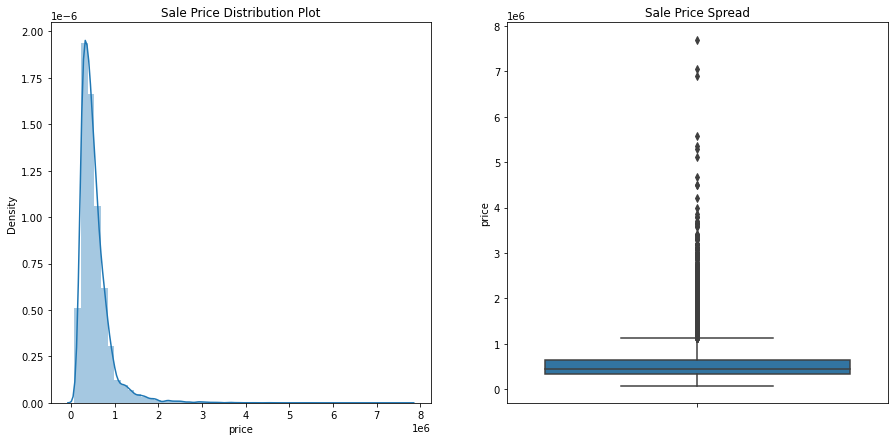

In [62]:
#look at distribution of target variable
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
plt.title('Sale Price Distribution Plot')
sns.distplot(df.price)

plt.subplot(1,2,2)
plt.title('Sale Price Spread')
sns.boxplot(y=df.price)

plt.show()

C:\Users\emine\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


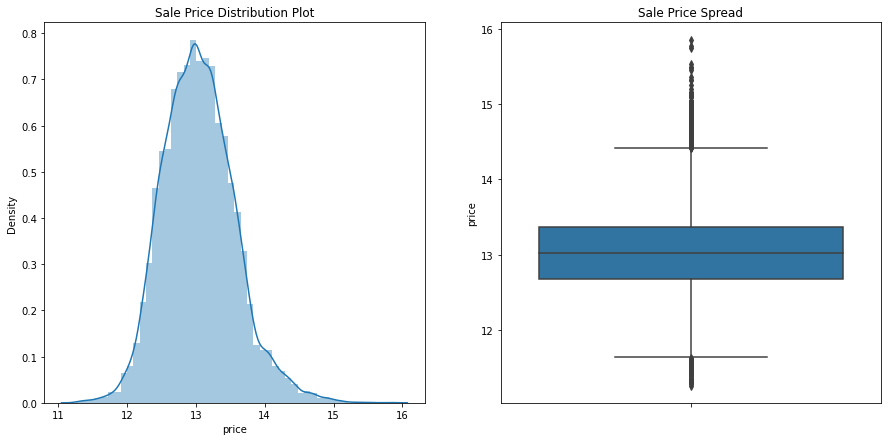

In [63]:
#look at distribution of logged transformed target variable
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
plt.title('Sale Price Distribution Plot')
sns.distplot(np.log(df.price))

plt.subplot(1,2,2)
plt.title('Sale Price Spread')
sns.boxplot(y=np.log(df.price))

plt.show()

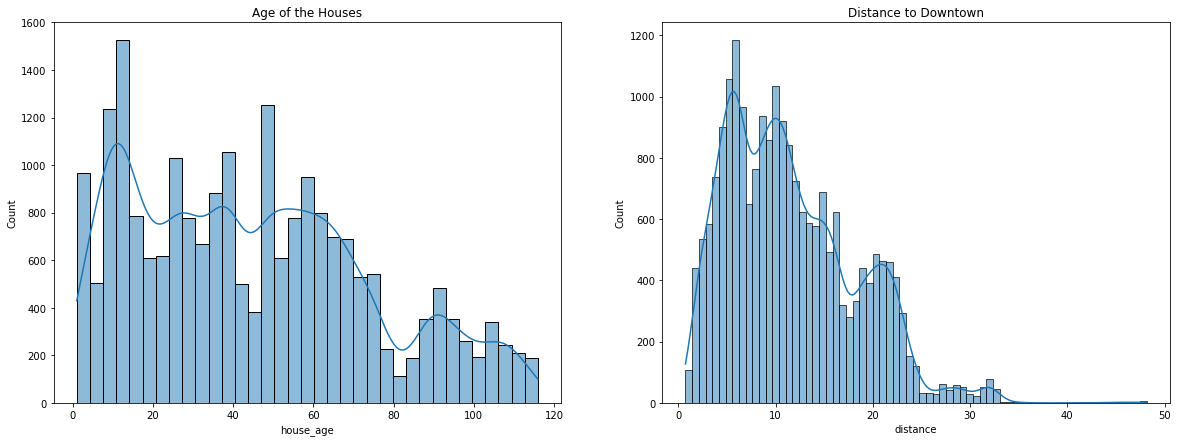

In [64]:
plt.figure(figsize=(20,7))

plt.subplot(1,2,1)
plt.title('Age of the Houses')
sns.histplot(df['house_age'], kde=True)

plt.subplot(1,2,2)
plt.title('Distance to Downtown')
sns.histplot(df['distance'], kde=True)

plt.show()

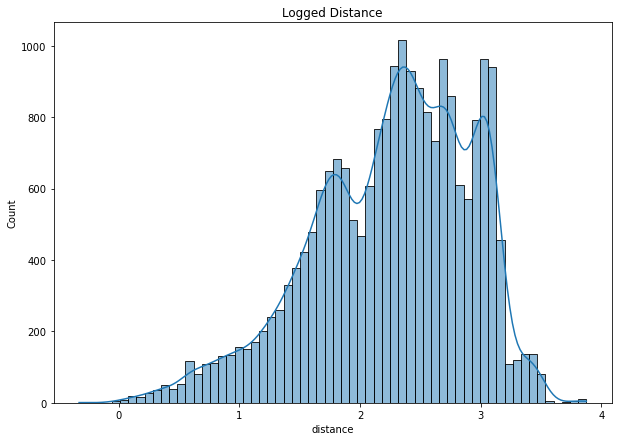

In [65]:
plt.figure(figsize=(10,7))

plt.title('Logged Distance')
sns.histplot(np.log(df['distance']), kde=True)


plt.show()

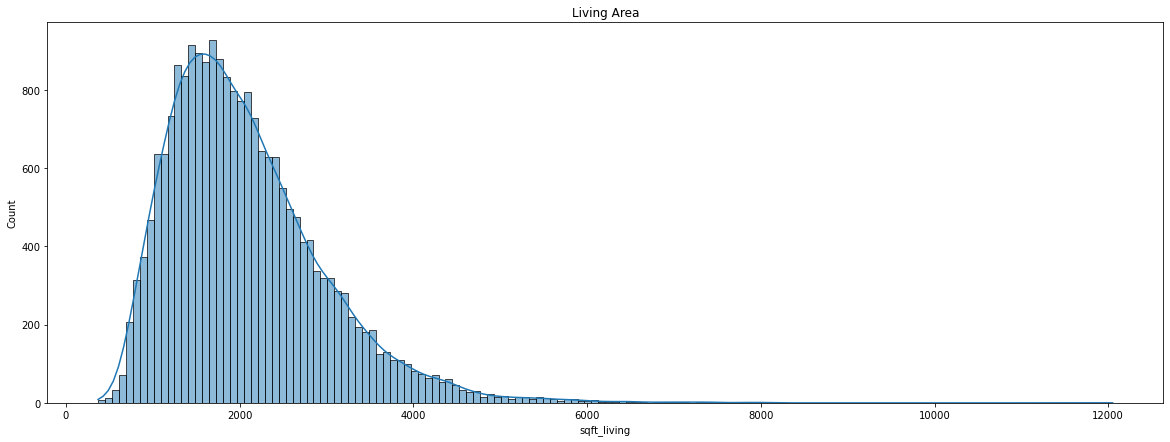

In [66]:
plt.figure(figsize=(20,7))

plt.title('Living Area')
sns.histplot(df['sqft_living'], kde=True)


plt.show()

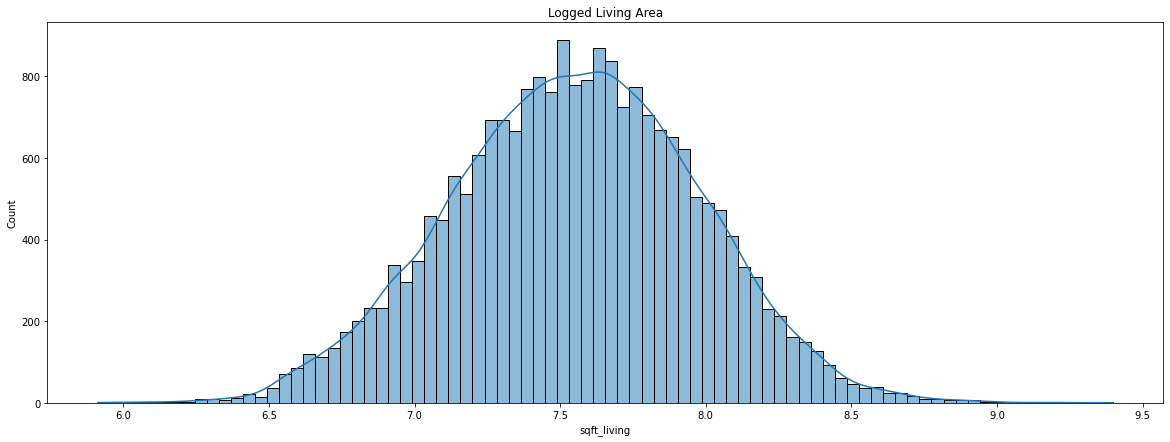

In [67]:
plt.figure(figsize=(20,7))

plt.title('Logged Living Area')
sns.histplot(np.log(df['sqft_living']), kde=True)


plt.show()

C:\Users\emine\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\emine\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


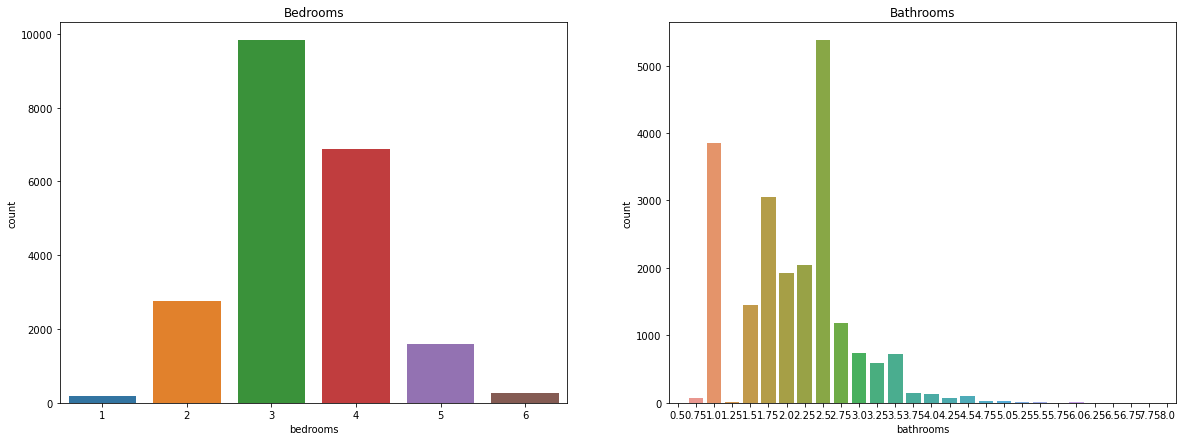

In [68]:
plt.figure(figsize=(20,7))

plt.subplot(1,2,1)
plt.title('Bedrooms')
sns.countplot(df['bedrooms'])

plt.subplot(1,2,2)
plt.title('Bathrooms')
sns.countplot(df['bathrooms'])

plt.show()

In [69]:
np.abs(df.corr()['price']).sort_values(ascending=False)

price                  1.000000
sqft_living            0.701418
grade_int              0.667501
sqft_above             0.603409
sqft_living15          0.584742
bathrooms              0.525264
grade_11 Excellent     0.356181
view_NONE              0.353783
grade_10 Very Good     0.341159
sqft_basement          0.321186
grade_7 Average        0.316079
bedrooms               0.313559
lat                    0.307492
view_EXCELLENT         0.304120
grade_12 Luxury        0.287740
distance               0.281466
waterfront             0.266526
floors                 0.254481
grade_9 Better         0.237715
grade_13 Mansion       0.213446
grade_6 Low Average    0.210034
view_GOOD              0.183774
view_AVERAGE           0.146104
view_FAIR              0.092349
sqft_lot               0.089266
grade_5 Fair           0.084822
sqft_lot15             0.082204
house_age              0.056715
yr_built               0.056715
cond_Very Good         0.055444
zipcode                0.053291
cond_Fai

We see from the above correlation coefficients that, 'sqrt_living' column has the highest correlation coefficient with the 'price' column. If we want to build a simple linear regression model to predict 'price' of the houses, we should choose 'sqrt_living' as our independent variable.

## Modeling

Describe and justify the process for analyzing or modeling the data.

Questions to consider:

- How did you analyze the data to arrive at an initial approach?
- How did you iterate on your initial approach to make it better?
- Why are these choices appropriate given the data and the business problem?

In [70]:
X = df.drop(columns=['id', 'price'])
y = df['price']

In [71]:
# Train - Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [72]:
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

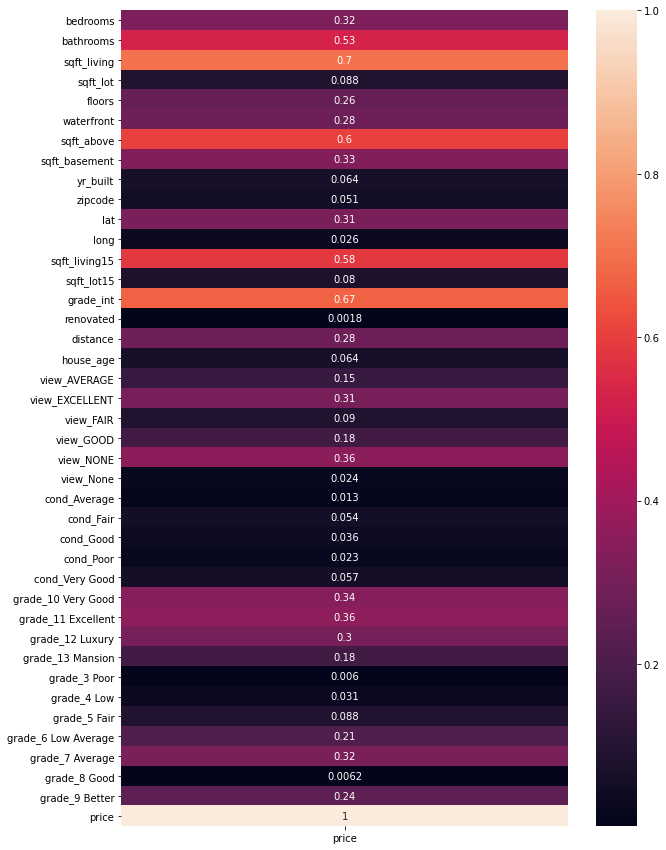

In [73]:
# Absolute value correlations with price
plt.figure(figsize=(10,15))
sns.heatmap(abs(train_df.corr())[['price']], annot=True);

## Evaluation

The evaluation of each model should accompany the creation of each model, and you should be sure to evaluate your models consistently.

Evaluate how well your work solves the stated business problem. 

Questions to consider:

- How do you interpret the results?
- How well does your model fit your data? How much better is this than your baseline model? Is it over or under fit?
- How well does your model/data fit any modeling assumptions?

For the final model, you might also consider:

- How confident are you that your results would generalize beyond the data you have?
- How confident are you that this model would benefit the business if put into use?

### Baseline Understanding

- What does a baseline, model-less prediction look like?

In [74]:
# code here to arrive at a baseline prediction
train_target_mean = y_train.mean()
train_target_mean

536782.4468796434

In [75]:
baseline_train_preds = [train_target_mean]*len(y_train)

In [76]:
baseline_test_preds = [train_target_mean]*len(y_test)

Train R2: 0.0000
Test R2: -0.0006
*****
Train RMSE: $358,613.64
Train RMSE: $384,280.78
*****
Train MAE: $230,726.56
Train MAE: $237,365.86
*****


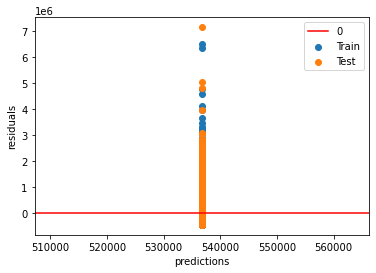

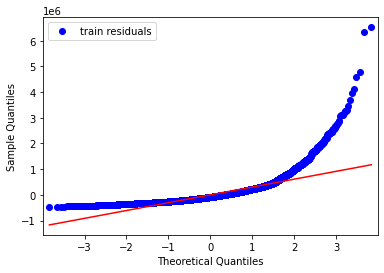

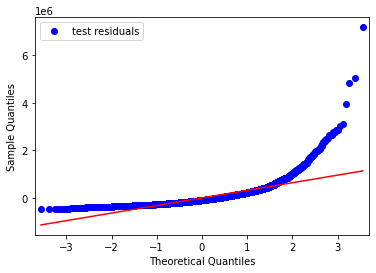

In [77]:
evaluate(y_train, baseline_train_preds, y_test, baseline_test_preds)

### First Substandard Model

Before going too far down the data preparation rabbit hole, be sure to check your work against a first 'substandard' model! What is the easiest way for you to find out how hard your problem is?

-- Using 'sqft_living' column as a predictor for 'price' target variable.

In [78]:
# code here for your first 'substandard' model
fsm_X_train= X_train['sqft_living']
fsm_X_test = X_test['sqft_living']

In [79]:
# code here to evaluate your first 'substandard' model
fsm = sm.OLS(y_train, sm.add_constant(fsm_X_train)).fit()

In [80]:
fsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 1.570e+04
Date:                Wed, 06 Oct 2021   Prob (F-statistic):               0.00
Time:                        17:11:03   Log-Likelihood:            -2.2402e+05
No. Observations:               16152   AIC:                         4.480e+05
Df Residuals:                   16150   BIC:                         4.481e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3.672e+04   4998.572     -7.346      0.000   -4.65e+04   -2.69e+04
sqft_living   276.5202      2.207    125.303      0.000     272.195     280.846
==============================================================================
Omnibus:                    10814.168   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           375526.619
Skew:                           2.736   Prob(JB):                         0.00
Kurtosis:                      25.979   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [81]:
fsm_train_preds = fsm.predict(sm.add_constant(fsm_X_train))
fsm_test_preds = fsm.predict(sm.add_constant(fsm_X_test))

Train R2: 0.4929
Test R2: 0.4886
*****
Train RMSE: $255,359.83
Train RMSE: $274,736.23
*****
Train MAE: $171,143.06
Train MAE: $175,838.12
*****


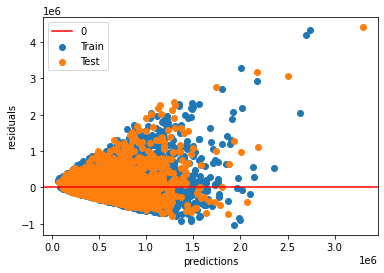

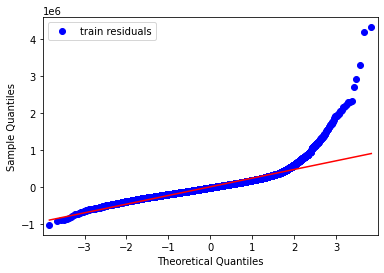

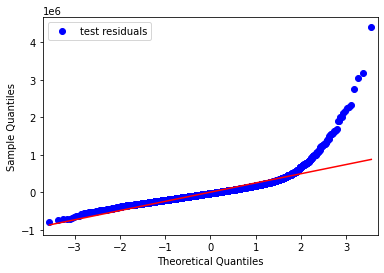

In [82]:
evaluate(y_train, fsm_train_preds, y_test, fsm_test_preds)

As seen from the residuals plot above, there is heteroskedasticity problem, which means that the spread of residuals is different at different levels of the fitted values. In order to overcome heteroskedasticity, we can do variable transformation (i.e. log transformation) of the target column. 

In [83]:
logged_fsm_y_train= np.log(y_train)
logged_fsm_y_test= np.log(y_test)

In [84]:
fsm_logged = sm.OLS(logged_fsm_y_train, sm.add_constant(fsm_X_train)).fit()

In [85]:
fsm_logged.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                 1.508e+04
Date:                Wed, 06 Oct 2021   Prob (F-statistic):               0.00
Time:                        17:11:05   Log-Likelihood:                -7164.5
No. Observations:               16152   AIC:                         1.433e+04
Df Residuals:                   16150   BIC:                         1.435e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.2138      0.007   1654.842      0.000      12.199      12.228
sqft_living     0.0004   3.26e-06    122.819      0.000       0.000       0.000
==============================================================================
Omnibus:                       44.606   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.913
Skew:                           0.032   Prob(JB):                     1.59e-08
Kurtosis:                       2.778   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [86]:
logged_fsm_train_preds = fsm_logged.predict(sm.add_constant(fsm_X_train))
logged_fsm_test_preds = fsm_logged.predict(sm.add_constant(fsm_X_test))

Train R2: 0.4829
Test R2: 0.4854
*****
Train RMSE: $256,861.65
Train RMSE: $357,192.44
*****
Train MAE: $162,583.11
Train MAE: $169,924.69
*****


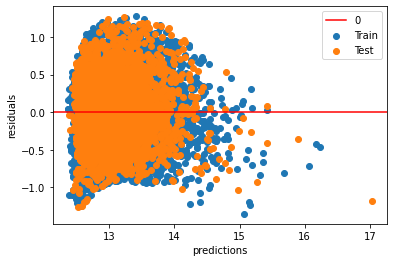

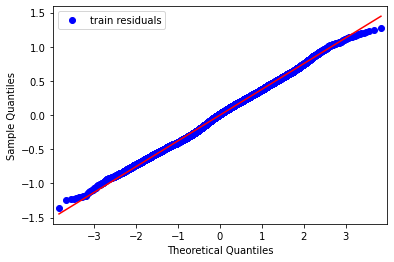

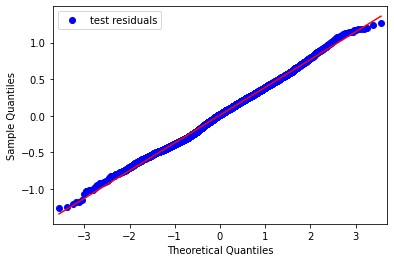

In [87]:
evaluate(logged_fsm_y_train, logged_fsm_train_preds, logged_fsm_y_test, logged_fsm_test_preds, log=True)

### Modeling Iterations

Now you can start to use the results of your first model to iterate - there are many options!

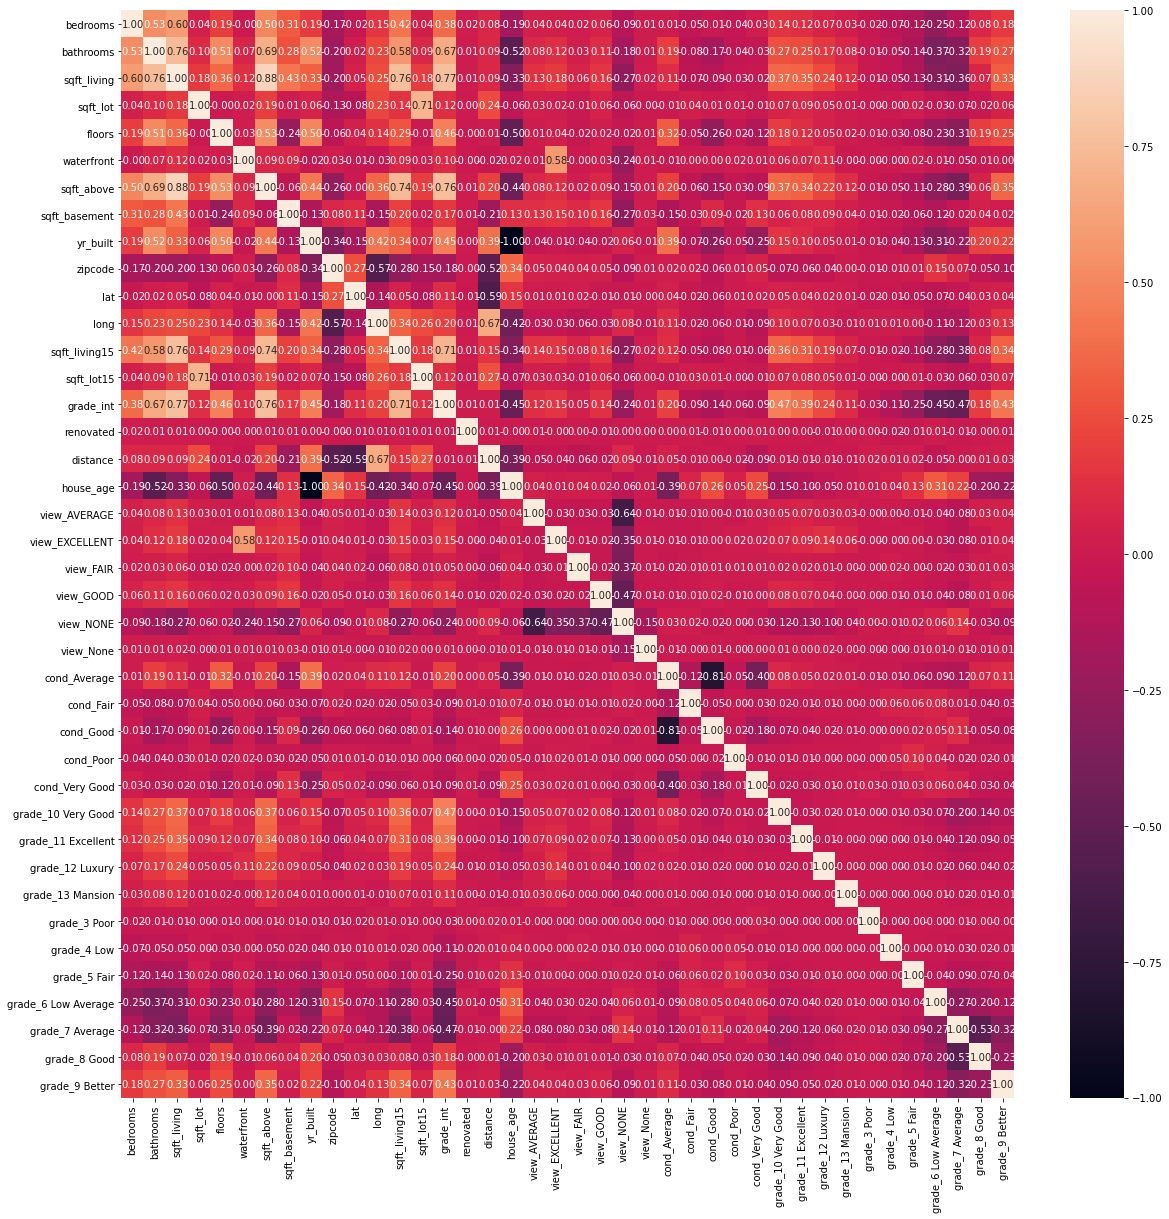

In [88]:
# Let's start looking into correlation matrix to decide new independent variables and check multicollinearity
plt.figure(figsize=(20,20))
sns.heatmap(X_train.corr(), annot=True, fmt='.2f');

For better analysis, we decided to add more independent variables to the model. 

#### MODEL 1
We will use 'sqft_living' and 'house_age' columns for the analysis.  

In [89]:
X_train.describe()

bedrooms     bathrooms   sqft_living      sqft_lot        floors  \
count  16152.000000  16152.000000  16152.000000  1.615200e+04  16152.000000   
mean       3.355188      2.110157   2073.988361  1.489425e+04      1.489073   
std        0.871656      0.763520    910.572379  3.983008e+04      0.536156   
min        1.000000      0.500000    370.000000  5.200000e+02      1.000000   
25%        3.000000      1.687500   1420.000000  5.040000e+03      1.000000   
50%        3.000000      2.250000   1900.000000  7.615000e+03      1.500000   
75%        4.000000      2.500000   2540.000000  1.060225e+04      2.000000   
max        6.000000      7.750000  10040.000000  1.164794e+06      3.500000   

         waterfront    sqft_above  sqft_basement      yr_built       zipcode  \
count  16152.000000  16152.000000   16152.000000  16152.000000  16152.000000   
mean       0.006501   1783.697932     290.290428   1970.925953  98078.111689   
std        0.080367    823.938884     438.741691     29.372254     53.442732   
min        0.000000    370.000000       0.000000   1900.000000  98001.000000   
25%        0.000000   1190.000000       0.000000   1951.750000  98033.000000   
50%        0.000000   1560.000000       0.000000   1975.000000  98065.000000   
75%        0.000000   2208.500000     560.000000   1997.000000  98117.000000   
max        1.000000   8860.000000    4820.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15     grade_int  \
count  16152.000000  16152.000000   16152.000000   16152.000000  16152.000000   
mean      47.559785   -122.213871    1982.406637   12686.519936      7.651622   
std        0.138401      0.140203     686.357271   27385.562584      1.171734   
min       47.155900   -122.519000     399.000000     748.000000      3.000000   
25%       47.469400   -122.328000    1480.000000    5100.000000      7.000000   
50%       47.571900   -122.230000    1840.000000    7620.000000      7.000000   
75%       47.677700   -122.126000    2360.000000   10022.250000      8.000000   
max       47.777600   -121.315000    6210.000000  871200.000000     13.000000   

         renovated      distance     house_age  view_AVERAGE  view_EXCELLENT  \
count  16152.00000  16152.000000  16152.000000  16152.000000    16152.000000   
mean       0.82287     11.514171     45.074047      0.043957        0.013683   
std        0.38179      6.581631     29.372254      0.205007        0.116173   
min        0.00000      0.719565      1.000000      0.000000        0.000000   
25%        1.00000      6.111223     19.000000      0.000000        0.000000   
50%        1.00000     10.380203     41.000000      0.000000        0.000000   
75%        1.00000     15.790540     64.250000      0.000000        0.000000   
max        1.00000     48.161387    116.000000      1.000000        1.000000   

          view_FAIR     view_GOOD     view_NONE     view_None  cond_Average  \
count  16152.000000  16152.000000  16152.000000  16152.000000  16152.000000   
mean       0.015292      0.024146      0.900446      0.002476      0.647969   
std        0.122716      0.153506      0.299414      0.049704      0.477618   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      1.000000      0.000000      0.000000   
50%        0.000000      0.000000      1.000000      0.000000      1.000000   
75%        0.000000      0.000000      1.000000      0.000000      1.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

          cond_Fair     cond_Good     cond_Poor  cond_Very Good  \
count  16152.000000  16152.000000  16152.000000    16152.000000   
mean       0.008296      0.262568      0.001362        0.079804   
std        0.090708      0.440043      0.036882        0.270998   
min        0.000000      0.000000      0.000000        0.000000   
25%        0.000000      0.000000      0.000000        0.000000   
50%        0.

In [90]:
X_test.describe()

bedrooms    bathrooms   sqft_living      sqft_lot       floors  \
count  5384.000000  5384.000000   5384.000000  5.384000e+03  5384.000000   
mean      3.373514     2.115063   2078.837481  1.570525e+04     1.506129   
std       0.885185     0.758593    907.063657  4.585919e+04     0.549229   
min       1.000000     0.500000    420.000000  6.490000e+02     1.000000   
25%       3.000000     1.750000   1430.000000  5.060000e+03     1.000000   
50%       3.000000     2.250000   1930.000000  7.615500e+03     1.500000   
75%       4.000000     2.500000   2540.500000  1.081450e+04     2.000000   
max       6.000000     8.000000  12050.000000  1.651359e+06     3.500000   

        waterfront   sqft_above  sqft_basement     yr_built       zipcode  \
count  5384.000000  5384.000000    5384.000000  5384.000000   5384.000000   
mean      0.007615  1789.743128     289.094354  1971.373886  98077.387816   
std       0.086940   821.209435     443.678444    29.322077     53.763945   
min       0.000000   420.000000       0.000000  1900.000000  98001.000000   
25%       0.000000  1200.000000       0.000000  1951.000000  98031.000000   
50%       0.000000  1560.000000       0.000000  1975.000000  98065.000000   
75%       0.000000  2210.000000     560.000000  1997.000000  98118.000000   
max       1.000000  8570.000000    3480.000000  2015.000000  98199.000000   

               lat         long  sqft_living15     sqft_lot15    grade_int  \
count  5384.000000  5384.000000    5384.000000    5384.000000  5384.000000   
mean     47.560373  -122.213868    1996.000929   12978.116085     7.670134   
std       0.139372     0.142596     679.242162   26936.013707     1.172171   
min      47.177500  -122.514000     670.000000     651.000000     4.000000   
25%      47.473425  -122.330000    1500.000000    5120.000000     7.000000   
50%      47.570700  -122.231000    1850.000000    7633.000000     7.000000   
75%      47.678800  -122.122000    2370.000000   10242.500000     8.000000   
max      47.777600  -121.316000    6110.000000  425581.000000    13.000000   

         renovated     distance    house_age  view_AVERAGE  view_EXCELLENT  \
count  5384.000000  5384.000000  5384.000000   5384.000000     5384.000000   
mean      0.820394    11.555431    44.626114      0.044948        0.017459   
std       0.383895     6.698143    29.322077      0.207209        0.130987   
min       0.000000     1.001389     1.000000      0.000000        0.000000   
25%       1.000000     6.148050    19.000000      0.000000        0.000000   
50%       1.000000    10.302977    41.000000      0.000000        0.000000   
75%       1.000000    15.774873    65.000000      0.000000        0.000000   
max       1.000000    48.089919   116.000000      1.000000        1.000000   

         view_FAIR    view_GOOD    view_NONE    view_None  cond_Average  \
count  5384.000000  5384.000000  5384.000000  5384.000000   5384.000000   
mean      0.014859     0.021731     0.896731     0.004272      0.652489   
std       0.120999     0.145818     0.304338     0.065226      0.476224   
min       0.000000     0.000000     0.000000     0.000000      0.000000   
25%       0.000000     0.000000     1.000000     0.000000      0.000000   
50%       0.000000     0.000000     1.000000     0.000000      1.000000   
75%       0.000000     0.000000     1.000000     0.000000      1.000000   
max       1.000000     1.000000     1.000000     1.000000      1.000000   

         cond_Fair    cond_Good    cond_Poor  cond_Very Good  \
count  5384.000000  5384.000000  5384.000000     5384.000000   
mean      0.006686     0.264116     0.001300        0.075409   
std       0.081505     0.440902     0.036037        0.264074   
min       0.000000     0.000000     0.000000        0.000000   
25%       0.000000     0.000000     0.000000        0.000000   
50%       0.000000     0.000000     0.000000        0.000000   
75%       0.000000     1.000000     0.000000        0.000000   
max       1.000000     1.000000     1

In [91]:
train_df.head()

date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
19692  10/21/2014         5       3.50         4170      9090     2.0   
9959   11/19/2014         1       2.00         1240      4800     2.0   
6640    1/15/2015         3       2.25         1750      9298     1.0   
2220    6/27/2014         4       2.75         2300     37533     1.0   
2999    8/25/2014         3       1.75         1380      3561     1.0   

       waterfront  sqft_above  sqft_basement  yr_built yr_renovated  zipcode  \
19692         0.0        4170              0      2008          NaN    98004   
9959          0.0        1240              0      1910          NaN    98055   
6640          0.0        1410            340      1969          NaN    98058   
2220          0.0        1550            750      1979          NaN    98070   
2999          0.0         860            520      1925          NaN    98117   

           lat     long  sqft_living15  sqft_lot15  grade_int view_YES  \
19692  47.5918 -122.196           1930       13635         10        0   
9959   47.4778 -122.211           1030        4800          6        0   
6640   47.4579 -122.164           1720        7875          7        0   
2220   47.3714 -122.431           2130       10092          8        1   
2999   47.6822 -122.399           1820        4593          7        0   

       renovated   distance  house_age  view_AVERAGE  view_EXCELLENT  \
19692          1   6.531240          8           0.0             0.0   
9959           1  10.514023        106           0.0             0.0   
6640           1  12.916585         47           0.0             0.0   
2220           0  16.760056         37           0.0             0.0   
2999           1   6.127187         91           0.0             0.0   

       view_FAIR  view_GOOD  view_NONE  view_None  cond_Average  cond_Fair  \
19692        0.0        0.0        1.0        0.0           1.0        0.0   
9959         0.0        0.0        1.0        0.0           1.0        0.0   
6640         0.0        0.0        1.0        0.0           0.0        0.0   
2220         0.0        1.0        0.0        0.0           0.0        0.0   
2999         0.0        0.0        1.0        0.0           0.0        0.0   

       cond_Good  cond_Poor  cond_Very Good  grade_10 Very Good  \
19692        0.0        0.0             0.0                 1.0   
9959         0.0        0.0             0.0                 0.0   
6640         1.0        0.0             0.0                 0.0   
2220         0.0        0.0             1.0                 0.0   
2999         1.0        0.0             0.0                 0.0   

       grade_11 Excellent  grade_12 Luxury  grade_13 Mansion  grade_3 Poor  \
19692                 0.0              0.0               0.0           0.0   
9959                  0.0              0.0               0.0           0.0   
6640                  0.0              0.0               0.0           0.0   
2220                  0.0              0.0               0.0           0.0   
2999                  0.0              0.0               0.0           0.0   

       grade_4 Low  grade_5 Fair  grade_6 Low Average  grade_7 Average  \
19692          0.0           0.0                  0.0              0.0   
9959           0.0           0.0                  1.0              0.0   
6640           0.0           0.0                  0.0              1.0   
2220           0.0           0.0                  0.0              0.0   
2999           0.0           0.0                  0.0              1.0   

       grade_8 Good  grade_9 Better      price  
19692           0.0             0.0  1450000.0  
9959            0.0             0.0   290000.0  
6640            0.0             0.0   265000.0  
2220            1.0             0.0   453000.0  
2999            0.0             0.0   535000.0

In [92]:
test_df.head()

date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
4303    8/25/2014         3       1.00         1130      7200     1.5   
9876    3/16/2015         3       1.75         1520      9605     1.0   
7434   10/10/2014         3       1.75         2480     10804     1.0   
12624   12/5/2014         3       3.25         3050     12700     2.0   
20661    4/3/2015         3       2.50         1608      4000     2.0   

       waterfront  sqft_above  sqft_basement  yr_built yr_renovated  zipcode  \
4303          0.0        1130              0      1942          NaN    98133   
9876          0.0        1520              0      1975          NaN    98052   
7434          0.0        1800            680      1976          NaN    98177   
12624         0.0        2240            810      1990          NaN    98011   
20661         0.0        1608              0      2014          NaN    98092   

           lat     long  sqft_living15  sqft_lot15  grade_int view_YES  \
4303   47.7298 -122.355           1350        1358          6        0   
9876   47.6670 -122.142           2040        9900          7        0   
7434   47.7721 -122.367           2480       10400          8        0   
12624  47.7445 -122.214           3050       12386          8        0   
20661  47.2582 -122.198           2009        4983          8        0   

       renovated   distance  house_age  view_AVERAGE  view_EXCELLENT  \
4303           0   8.675417         74           0.0             0.0   
9876           1   9.953003         41           0.0             0.0   
7434           1  11.644119         40           0.0             0.0   
12624          1  11.155452         26           0.0             0.0   
20661          1  24.796731          2           0.0             0.0   

       view_FAIR  view_GOOD  view_NONE  view_None  cond_Average  cond_Fair  \
4303         0.0        0.0        1.0        0.0           0.0        0.0   
9876         0.0        0.0        1.0        0.0           1.0        0.0   
7434         0.0        0.0        1.0        0.0           1.0        0.0   
12624        0.0        0.0        1.0        0.0           1.0        0.0   
20661        0.0        0.0        1.0        0.0           1.0        0.0   

       cond_Good  cond_Poor  cond_Very Good  grade_10 Very Good  \
4303         1.0        0.0             0.0                 0.0   
9876         0.0        0.0             0.0                 0.0   
7434         0.0        0.0             0.0                 0.0   
12624        0.0        0.0             0.0                 0.0   
20661        0.0        0.0             0.0                 0.0   

       grade_11 Excellent  grade_12 Luxury  grade_13 Mansion  grade_3 Poor  \
4303                  0.0              0.0               0.0           0.0   
9876                  0.0              0.0               0.0           0.0   
7434                  0.0              0.0               0.0           0.0   
12624                 0.0              0.0               0.0           0.0   
20661                 0.0              0.0               0.0           0.0   

       grade_4 Low  grade_5 Fair  grade_6 Low Average  grade_7 Average  \
4303           0.0           0.0                  1.0              0.0   
9876           0.0           0.0                  0.0              1.0   
7434           0.0           0.0                  0.0              0.0   
12624          0.0           0.0                  0.0              0.0   
20661          0.0           0.0                  0.0              0.0   

       grade_8 Good  grade_9 Better     price  
4303            0.0             0.0  316000.0  
9876            0.0             0.0  530000.0  
7434            1.0             0.0  489950.0  
12624           1.0             0.0  585000.0  
20661           1.0             0.0  274950.0

Let's start filtering dataframes by choosing the relevant columns.

In [93]:
relevant_columns = ['price', 'sqft_living', 'house_age']

In [94]:
model1_train_df = train_df[relevant_columns]

In [95]:
model1_test_df= test_df[relevant_columns]

In [96]:
model1_X_train = model1_train_df[['sqft_living',  'house_age']]
model1_y_train = np.log(model1_train_df['price'])

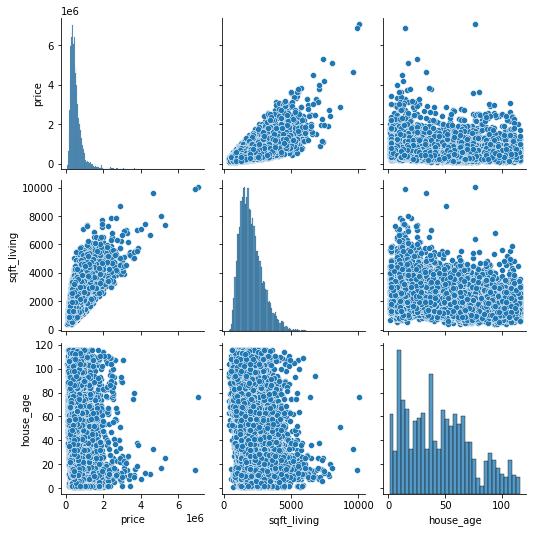

In [97]:
sns.pairplot(model1_train_df[['price', 'sqft_living','house_age']]);

In [98]:
model1 = sm.OLS(model1_y_train, sm.add_constant(model1_X_train)).fit()

In [99]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     8283.
Date:                Wed, 06 Oct 2021   Prob (F-statistic):               0.00
Time:                        17:11:36   Log-Likelihood:                -6790.1
No. Observations:               16152   AIC:                         1.359e+04
Df Residuals:                   16149   BIC:                         1.361e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.0184      0.010   1190.930      0.000      11.999      12.038
sqft_living     0.0004   3.38e-06    127.724      0.000       0.000       0.000
house_age       0.0029      0.000     27.682      0.000       0.003       0.003
==============================================================================
Omnibus:                       24.807   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.685
Skew:                          -0.088   Prob(JB):                     4.36e-06
Kurtosis:                       2.926   Cond. No.                     7.89e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [100]:
model1_X_test = model1_test_df[['sqft_living', 'house_age']]
model1_y_test = np.log(model1_test_df['price'])

In [101]:
model1_train_preds = model1.predict(sm.add_constant(model1_X_train))
model1_test_preds = model1.predict(sm.add_constant(model1_X_test))

Train R2: 0.5064
Test R2: 0.5058
*****
Train RMSE: $265,669.85
Train RMSE: $524,269.78
*****
Train MAE: $158,483.94
Train MAE: $169,917.38
*****


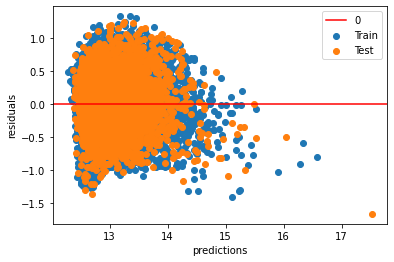

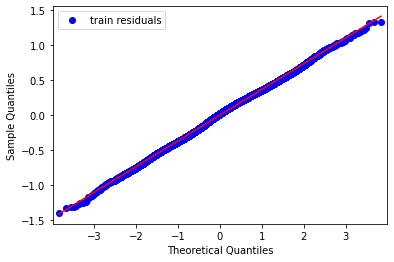

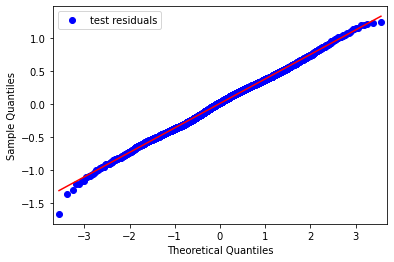

In [102]:
evaluate(model1_y_train, model1_train_preds, model1_y_test, model1_test_preds, log=True)

R2 is increased to 0.50, better than simple linear regression model. But not better enough. 

We used 'sqft_living' and 'house_age' as predictors, and used logged transformed version of price column as target variable.

#### MODEL 2

We will use 'sqft_living', 'house_age', and 'distance' columns for the analysis.  

In [103]:
relevant_columns2 = ['price', 'sqft_living', 'house_age', 'distance']

In [104]:
model2_train_df = train_df[relevant_columns2]

In [105]:
model2_test_df= test_df[relevant_columns2]

In [106]:
model2_X_train = model2_train_df[['sqft_living', 'house_age', 'distance']]
model2_y_train = np.log(model2_train_df['price'])

In [107]:
model2 = sm.OLS(model2_y_train, sm.add_constant(model2_X_train)).fit()

In [108]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     9907.
Date:                Wed, 06 Oct 2021   Prob (F-statistic):               0.00
Time:                        17:11:38   Log-Likelihood:                -4060.3
No. Observations:               16152   AIC:                             8129.
Df Residuals:                   16148   BIC:                             8159.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.5552      0.011   1160.669      0.000      12.534      12.576
sqft_living     0.0004   2.86e-06    146.766      0.000       0.000       0.000
house_age      -0.0001    9.6e-05     -1.132      0.258      -0.000    7.95e-05
distance       -0.0327      0.000    -80.585      0.000      -0.033      -0.032
==============================================================================
Omnibus:                      264.822   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              359.406
Skew:                          -0.214   Prob(JB):                     9.03e-79
Kurtosis:                       3.592   Cond. No.                     1.00e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [109]:
model2_X_test = model2_test_df[['sqft_living', 'house_age', 'distance']]
model2_y_test = np.log(model2_test_df['price'])

In [110]:
model2_train_preds = model2.predict(sm.add_constant(model2_X_train))
model2_test_preds = model2.predict(sm.add_constant(model2_X_test))

Train R2: 0.6479
Test R2: 0.6391
*****
Train RMSE: $240,579.34
Train RMSE: $520,330.86
*****
Train MAE: $131,864.91
Train MAE: $145,700.98
*****


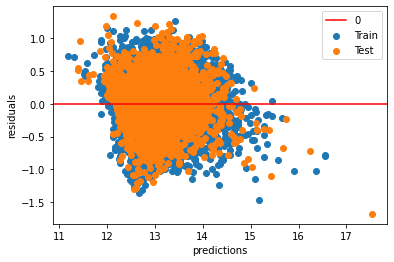

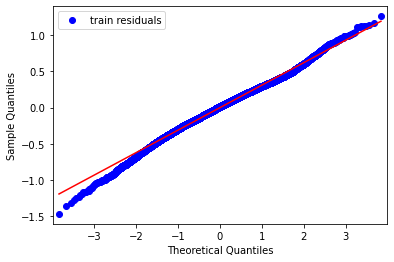

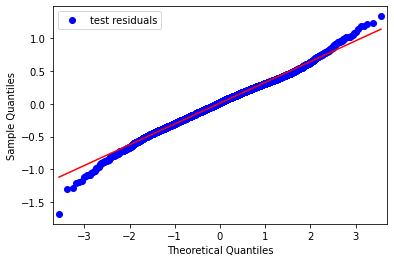

In [111]:
evaluate(model2_y_train, model2_train_preds, model2_y_test, model2_test_preds, log=True)

R2 increased to 0.64.

In [112]:
# # Import
# import plotly.express as px

# # Explore relationship between location and price
# fig = px.scatter_mapbox(data_frame = df, # df name
#                         lat='lat', # name of latitude column
#                         lon='long', # name of longitude column
#                         color='price', # name of column to use for the color
#                         zoom=8)

# fig.update_layout(mapbox_style="open-street-map")
# fig.show()

In [113]:
# Import
import plotly.express as px

# Explore relationship between location and price
fig = px.scatter_mapbox(data_frame = df, # df name
                        lat='lat', # name of latitude column
                        lon='long', # name of longitude column
                        color='distance', # name of column to use for the color
                        zoom=8)

fig.update_layout(mapbox_style="open-street-map")
fig.show()

In [114]:
# # Import
# import plotly.express as px

# # Explore relationship between location and price
# fig = px.scatter_mapbox(data_frame = train_df, # df name
#                         lat='lat', # name of latitude column
#                         lon='long', # name of longitude column
#                         color='zipcode', # name of column to use for the color
#                         zoom=8)

# fig.update_layout(mapbox_style="open-street-map")
# fig.show()

In [115]:
# # code here to iteratively improve your models
# from sklearn.feature_selection import SelectKBest, mutual_info_regression
# selector = SelectKBest(mutual_info_regression, k =2)
# selector.fit(X, y)
# X.columns[selector.get_support()]

In [116]:
# code here to evaluate your iterations

### 'Final' Model

In the end, you'll arrive at a 'final' model - aka the one you'll use to make your recommendations/conclusions. This likely blends any group work. It might not be the one with the highest scores, but instead might be considered 'final' or 'best' for other reasons.

In [117]:
# code here to show your final model

In [118]:
# code here to evaluate your final model

## Conclusions

Provide your conclusions about the work you've done, including any limitations or next steps.

Questions to consider:

- What would you recommend the business do as a result of this work?
- What are some reasons why your analysis might not fully solve the business problem?
- What else could you do in the future to improve this project (future work)?
